# Homework with McDonald's sentiment data

## Imaginary problem statement

McDonald's receives **thousands of customer comments** on their website per day, and many of them are negative. Their corporate employees don't have time to read every single comment, but they do want to read a subset of comments that they are most interested in. In particular, the media has recently portrayed their employees as being rude, and so they want to review comments about **rude service**.

McDonald's has hired you to develop a system that ranks each comment by the **likelihood that it is referring to rude service**. They will use your system to build a "rudeness dashboard" for their corporate employees, so that employees can spend a few minutes each day examining the **most relevant recent comments**.

## Description of the data

Before hiring you, McDonald's used the [CrowdFlower platform](http://www.crowdflower.com/data-for-everyone) to pay humans to **hand-annotate** about 1500 comments with the **type of complaint**. The complaint types are listed below, with the encoding used in the data listed in parentheses:

- Bad Food (BadFood)
- Bad Neighborhood (ScaryMcDs)
- Cost (Cost)
- Dirty Location (Filthy)
- Missing Item (MissingFood)
- Problem with Order (OrderProblem)
- Rude Service (RudeService)
- Slow Service (SlowService)
- None of the above (na)

## Task 1

Read **`mcdonalds.csv`** into a pandas DataFrame and examine it. (It can be found in the **`data`** directory of the course repository.)

- The **policies_violated** column lists the type of complaint. If there is more than one type, the types are separated by newline characters.
- The **policies_violated:confidence** column lists CrowdFlower's confidence in the judgments of its human annotators for that row (higher is better).
- The **city** column is the McDonald's location.
- The **review** column is the actual text comment.

In [1]:
import pandas as pd

In [2]:
#read data 
md_data = pd.read_csv('mcdonalds.csv')

In [3]:
md_data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'policies_violated',
       'policies_violated:confidence', 'city', 'policies_violated_gold',
       'review', 'Unnamed: 10'],
      dtype='object')

In [4]:
md_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN


## Task 2

Remove any rows from the DataFrame in which the **policies_violated** column has a **null value**. Check the shape of the DataFrame before and after to confirm that you only removed about 50 rows.

- **Note:** Null values are also known as "missing values", and are encoded in pandas with the special value "NaN". This is distinct from the "na" encoding used by CrowdFlower to denote "None of the above". Rows that contain "na" should **not** be removed.
- **Hint:** [How do I handle missing values in pandas?](https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=16) explains how to do this.

In [5]:
#md_data1 = md_data[md_data.policies_violated.notnull()]
md_data1 = md_data.dropna(subset= ["policies_violated"])

In [6]:
print('Shape of old data',md_data.shape)
print('Shape of new data',md_data1.shape)
#print('Shape of new data2',md_data2.shape)

Shape of old data (1525, 11)
Shape of new data (1471, 11)


## Task 3

Add a new column to the DataFrame called **"rude"** that is 1 if the **policies_violated** column contains the text "RudeService", and 0 if the **policies_violated** column does not contain "RudeService". The "rude" column is going to be your response variable, so check how many zeros and ones it contains.

- **Hint:** [How do I use string methods in pandas?](https://www.youtube.com/watch?v=bofaC0IckHo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=12) shows how to search for the presence of a substring, and [How do I change the data type of a pandas Series?](https://www.youtube.com/watch?v=V0AWyzVMf54&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=13) shows how to convert the boolean results (True/False) to integers (1/0).

In [7]:
md_data1 = md_data1.assign(rude = md_data1.loc[:,'policies_violated'].str.contains('RudeService').astype(int))

In [8]:
md_data1.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review,Unnamed: 10,rude
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\nOrderProblem\nFilthy,1.0\n0.6667\n0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be...",NaN,1
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. ŒæI came in at 9:30...,NaN,1
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\nOrderProblem,1.0\n1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave...",NaN,0
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...,NaN,0
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo...",NaN,1


## Task 4

1. Define X (the **review** column) and y (the **rude** column).
2. Split X and y into training and testing sets (using the parameter **`random_state=1`**).
3. Use CountVectorizer (with the **default parameters**) to create document-term matrices from X_train and X_test.

In [9]:
#define X and y using review and rude columns from the dataframe
X = md_data1.review
y = md_data1.rude

#import required libraries for count vectorizer and train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#Split the data into train and test sample
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

#Define CountVectorizer with default parameters
vect = CountVectorizer()



In [10]:
#create document term matrix for train and test samples
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Task 5

Fit a Multinomial Naive Bayes model to the training set, calculate the **predicted probabilites** (not the class predictions) for the testing set, and then calculate the **AUC**. Repeat this task using a logistic regression model to see which of the two models achieves a better AUC.

- **Note:** Because McDonald's only cares about ranking the comments by the likelihood that they refer to rude service, **classification accuracy** is not the relevant evaluation metric. **Area Under the Curve (AUC)** is a more useful evaluation metric for this scenario, since it measures the ability of the classifier to assign higher predicted probabilities to positive instances than to negative instances.
- **Hint:** [Evaluating a classification model](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to calculate predicted probabilities and AUC, and my [blog post and video](http://www.dataschool.io/roc-curves-and-auc-explained/) explain AUC in-depth.

In [11]:
#import multinomial naivebayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
pred_mnb = clf.predict_proba(X_test_dtm)

In [13]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_dtm,y_train)
pred_lr = clf_lr.predict_proba(X_test_dtm)


In [14]:
# exprect probabilties for class 1 from both the classifiers
y_pred_mnb = pred_mnb[:,1]
y_pred_lr = pred_lr[:,1]

In [15]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

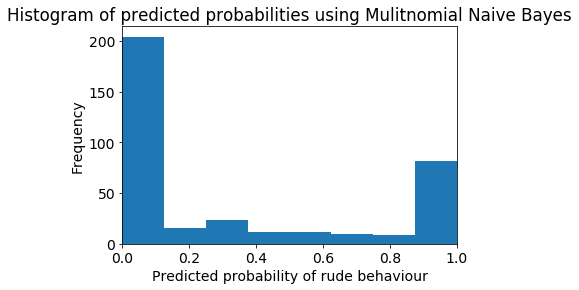

In [16]:
# histogram of predicted probabilities using multinomial naive bayes
plt.hist(y_pred_mnb, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities using Mulitnomial Naive Bayes')
plt.xlabel('Predicted probability of rude behaviour')
plt.ylabel('Frequency')

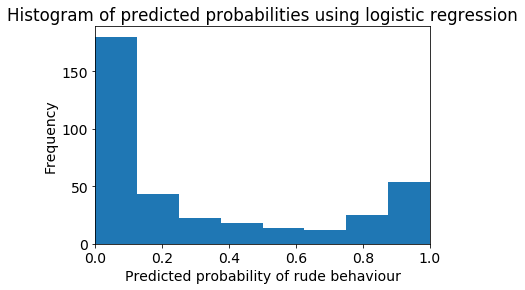

In [17]:
# histogram of predicted probabilities using logistic regression
plt.hist(y_pred_lr, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities using logistic regression')
plt.xlabel('Predicted probability of rude behaviour')
plt.ylabel('Frequency')

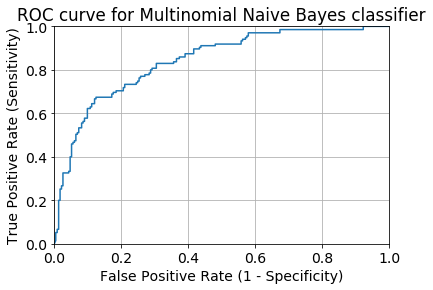

In [18]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted probabilities using Multinomial Naive Bayes
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_mnb)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Multinomial Naive Bayes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [19]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_mnb))

0.842600540455


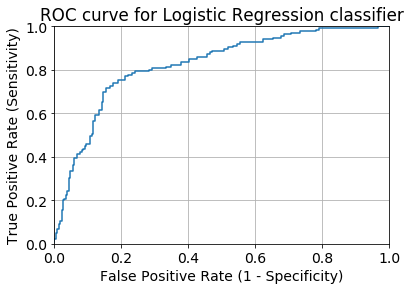

In [20]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities using Logistic Regression
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:
print(metrics.roc_auc_score(y_test, y_pred_lr))

0.823366714354


## Task 6

Using either Naive Bayes or logistic regression (whichever one had a better AUC in the previous step), try **tuning CountVectorizer** using some of the techniques we learned in class. Check the testing set **AUC** after each change, and find the set of parameters that increases AUC the most.

- **Hint:** It is highly recommended that you adapt the **`tokenize_test()`** function from class for this purpose, since it will allow you to iterate quickly through different sets of parameters.

In [22]:
def tokenize_clf_test(clf, vect,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    clf.fit(X_train_dtm,y_train)
    pred = clf.predict_proba(X_test_dtm)
    y_pred = pred[:,1]
    auc = metrics.roc_auc_score(y_test,y_pred)
    return auc
    

In [23]:
print(tokenize_clf_test(clf = clf_lr,vect = vect))

0.823366714354


In [24]:
print(tokenize_clf_test(clf = clf,vect = vect))

0.842600540455


In [25]:
vect = CountVectorizer(stop_words= 'english')
print(tokenize_clf_test(clf = clf,vect = vect))

0.853520902877


In [26]:
print(tokenize_clf_test(clf = clf_lr,vect = vect))

0.8317914481


In [27]:
vect = CountVectorizer(ngram_range=(1,2))

In [28]:
print(tokenize_clf_test(clf = clf,vect = vect))

0.819599427754


In [31]:
clf = MultinomialNB()
clf.fit(X_train_dtm,y_train)
print(tokenize_clf_test(clf = clf_lr,vect = vect))

0.849785407725


In [32]:
vect = CountVectorizer(lowercase=False)
print(tokenize_clf_test(clf = clf,vect = vect))

0.840645366396


In [33]:
print(tokenize_clf_test(clf = clf_lr,vect = vect))

0.832268319822


In [34]:
vect = CountVectorizer(max_df=0.5)
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.844889524718
Logistic Regression 0.820537275473


In [35]:
vect = CountVectorizer(min_df=0.5)
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.597758702909
Logistic Regression 0.566793832459


In [36]:
vect = CountVectorizer(ngram_range=(1,2),stop_words= 'english')
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.831616595136
Logistic Regression 0.840947385153


In [37]:
vect = CountVectorizer(ngram_range=(1,2),stop_words= 'english',max_features= 10000)
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.845382292163
Logistic Regression 0.835129550151


In [38]:
vect = CountVectorizer(ngram_range=(1,3),stop_words= 'english')
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.814210777301
Logistic Regression 0.841742171356


## Task 7 (Challenge)

The **city** column might be predictive of the response, but we are not currently using it as a feature. Let's see whether we can increase the AUC by adding it to the model:

1. Create a new DataFrame column, **review_city**, that concatenates the **review** text with the **city** text. One easy way to combine string columns in pandas is by using the [`Series.str.cat()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.cat.html) method. Make sure to use the **space character** as a separator, as well as replacing **null city values** with a reasonable string value (such as 'na').
2. Redefine X as the **review_city** column, and re-split X and y into training and testing sets.
3. When you run **`tokenize_test()`**, CountVectorizer will simply treat the city as an extra word in the review, and thus it will automatically be included in the model! Check to see whether it increased or decreased the AUC of your **best model**.

In [39]:
md_data2 = md_data1.assign(review_city = md_data1.review.str.cat(md_data1.city,sep = ' ',na_rep= 'NaN'))

In [40]:
#define X and y using review and rude columns from the dataframe
X = md_data2.review_city
y = md_data2.rude

In [41]:
md_data2.loc[1495:1500,['review_city','review','city']]

,review_city,review,city
1495,"very good mcdonald's ,good service NaN","very good mcdonald's ,good service",NaN
1496,Came here for the McCafe.Coffee was a little l...,Came here for the McCafe.Coffee was a little l...,NaN
1497,I actually got in an accident trying to leave ...,I actually got in an accident trying to leave ...,NaN
1498,Came here for breakfast and there was total ch...,Came here for breakfast and there was total ch...,NaN
1499,I dont like mcdonalds but go once in a great w...,I dont like mcdonalds but go once in a great w...,Chicago
1500,"If they went any slower, I would have grown a ...","If they went any slower, I would have grown a ...",Las Vegas


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)
vect = CountVectorizer(ngram_range=(1,2),stop_words= 'english',max_features= 2000)
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.856890796376
Logistic Regression 0.823652837387


## Task 8 (Challenge)

The **policies_violated:confidence** column may be useful, since it essentially represents a measurement of the training data quality. Let's see whether we can improve the AUC by only training the model using higher-quality rows!

To accomplish this, your first sub-task is to **calculate the mean confidence score for each row**, and then store those mean scores in a new column. For example, the confidence scores for the first row are `1.0\r\n0.6667\r\n0.6667`, so you should calculate a mean of `0.7778`. Here are the suggested steps:

1. Using the [`Series.str.split()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) method, convert the **policies_violated:confidence** column into lists of one or more "confidence scores". Save the results as a new DataFrame column called **confidence_list**.
2. Define a function that calculates the mean of a list of numbers, and pass that function to the [`Series.apply()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) method of the **confidence_list** column. That will calculate the mean confidence score for each row. Save those scores in a new DataFrame column called **confidence_mean**.
    - **Hint:** [How do I apply a function to a pandas Series or DataFrame?](https://www.youtube.com/watch?v=P_q0tkYqvSk&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=30) explains how to use the `Series.apply()` method.

In [43]:
import numpy as np
def get_mymean(mylist):
    mylist = list(map(float,mylist))
    return np.mean(mylist)
md_data2['confidence_list'] = md_data2['policies_violated:confidence'].str.split()
md_data2['confidence_mean'] = md_data2['confidence_list'].apply(get_mymean)

md_data2.loc[0:4,['confidence_list','confidence_mean']]

,confidence_list,confidence_mean
0,"[1.0, 0.6667, 0.6667]",0.7778
1,[1],1.0000
2,"[1.0, 1.0]",1.0000
3,[0.6667],0.6667
4,[1],1.0000


Your second sub-task is to **remove lower-quality rows from the training set**, and then repeat the model building and evaluation process. Here are the suggested steps:

1. Remove all rows from X_train and y_train that have a **confidence_mean lower than 0.75**. Check their shapes before and after to confirm that you removed about 300 rows.
2. Use the **`tokenize_test()`** function to check whether filtering the training data increased or decreased the AUC of your **best model**.
    - **Hint:** Even though X_train and y_train are separate from the mcd DataFrame, they can still be filtered using a boolean Series generated from mcd because all three objects share the same index.
    - **Note:** It's important that we don't remove any rows from the testing set (X_test and y_test), because the testing set should be representative of the real-world data we will encounter in the future (which will contain both high-quality and low-quality rows).

In [44]:
md_data3 = md_data2[md_data2.confidence_mean >= 0.75]
print (md_data2.shape,md_data3.shape)

(1471, 15) (1067, 15)


In [45]:
#define X and y using review and rude columns from the dataframe
X = md_data3.review_city
y = md_data3.rude

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)
vect = CountVectorizer(ngram_range=(1,2),stop_words= 'english',max_features= 2000)
print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

Multinomial Naive Bayes 0.856890796376
Logistic Regression 0.823652837387


## Task 9 (Challenge)

New comments have been submitted to the McDonald's website, and you need to **score them with the likelihood** that they are referring to rude service.

1. Before making predictions on out-of-sample data, it is important to re-train your model on all relevant data using the tuning parameters and preprocessing steps that produced the best AUC above.
    - In other words, X should be defined using either **all rows** or **only those rows with a confidence_mean of at least 0.75**, whichever produced a better AUC above.
    - X should refer to either the **review column** or the **review_city column**, whichever produced a better AUC above.
    - CountVectorizer should be instantiated with the **tuning parameters** that produced the best AUC above.
    - **`train_test_split()`** should not be used during this process.
2. Build a document-term matrix (from X) called **X_dtm**, and examine its shape.
3. Read the new comments stored in **`mcdonalds_new.csv`** into a DataFrame called **new_comments**, and examine it.
4. If your model uses a **review_city** column, create that column in the new_comments DataFrame. (Otherwise, skip this step.)
5. Build a document_term matrix (from the **new_comments** DataFrame) called **new_dtm**, and examine its shape.
6. Train your best model (Naive Bayes or logistic regression) using **X_dtm** and **y**.
7. Predict the "rude probability" for each comment in **new_dtm**, and store the probabilities in an object called **new_pred_prob**.
8. Print the **full text** for each new comment alongside its **"rude probability"**. (You may need to [increase the max_colwidth](https://www.youtube.com/watch?v=yiO43TQ4xvc&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=28) to see the full text.) Examine the results, and comment on how well you think the model performed!

In [47]:
#1
X = md_data3.review_city
y = md_data3.rude
vect = CountVectorizer(ngram_range=(1,2),stop_words= 'english',decode_error='ignore')

#2
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)

#3
md_new = pd.read_csv("mcdonalds_new.csv")
md_new.head()
#print('Multinomial Naive Bayes',tokenize_clf_test(clf = clf,vect = vect))
#print('Logistic Regression',tokenize_clf_test(clf = clf_lr,vect = vect))

(1067, 42418)


,city,review
0,Las Vegas,Went through the drive through and ordered a #...
1,Chicago,Phenomenal experience. Efficient and friendly ...
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...
3,New York,Close to my workplace. It was well manged befo...
4,Portland,I've made at least 3 visits to this particular...


In [48]:
md_new2 = md_new.assign(review_city = md_new.review.str.cat(md_new.city,sep = ' ',na_rep= 'NaN'))

In [49]:
md_new2.head()

,city,review,review_city
0,Las Vegas,Went through the drive through and ordered a #...,Went through the drive through and ordered a #...
1,Chicago,Phenomenal experience. Efficient and friendly ...,Phenomenal experience. Efficient and friendly ...
2,Los Angeles,Ghetto lady helped me at the drive thru. Very ...,Ghetto lady helped me at the drive thru. Very ...
3,New York,Close to my workplace. It was well manged befo...,Close to my workplace. It was well manged befo...
4,Portland,I've made at least 3 visits to this particular...,I've made at least 3 visits to this particular...


In [50]:
new_comments = md_new2.review_city
new_dtm = vect.transform(new_comments)
print(new_dtm.shape)

(10, 42418)


In [51]:
clf = MultinomialNB()
clf.fit(X_dtm,y)
new_pred_prob = clf.predict_proba(new_dtm )[:,1]

In [52]:
pd.set_option('display.max_colwidth',1000)

In [53]:
pd.DataFrame({'rude_probability': new_pred_prob,'Comments': new_comments})

,Comments,rude_probability
0,"Went through the drive through and ordered a #10 (cripsy sweet chili chicken wrap) without fries- the lady couldn't understand that I did not want fries and charged me for them anyways. I got the wrong order- a chicken sandwich and a large fries- my boyfriend took it back inside to get the correct order. The gentleman that ordered the chicken sandwich was standing there as well and she took the bag from my bf- glanced at the insides and handed it to the man without even offering to replace. I mean with all the scares about viruses going around... ugh DISGUSTING SERVICE. Then when she gave him the correct order my wrap not only had the sweet chili sauce on it, but the nasty (just not my first choice) ranch dressing on it!!!! I mean seriously... how lazy can you get!!!! I worked at McDonalds in Texas when I was 17 for about 8 months and I guess I was spoiled with good management. This was absolutely ridiculous. I was beyond disappointed. Las Vegas",0.018644
1,"Phenomenal experience. Efficient and friendly staff. Clean restrooms, good, fast service and bilingual staff. One of the best restaurants in the chain. Chicago",0.000273
2,Ghetto lady helped me at the drive thru. Very rude and disrespectful to the co workers. Never coming back. Yuck! Los Angeles,0.972656
3,"Close to my workplace. It was well manged before. Now it's OK. The parking can be tight sometimes. Like all McDonald's, prices are getting expensive. New York",0.002526
4,"I've made at least 3 visits to this particular location just because it's right next to my office building.. and all my experience have been consistently bad. There are a few helpers taking your orders throughout the drive-thru route and they are the worst. They rush you in placing an order and gets impatient once the order gets a tad bit complicated. Don't even bother changing your mind oh NO! They will glare at you and snap at you if you want to change something. I understand its FAST food, but I want my order placed right. Not going back if I can help it. Portland",0.048015
5,"Why did I revisited this McDonald's again. I needed to use the restroom facilities and the women's bathroom didn't have soap, the floor was wet, the bathroom stink, and the toilets were nasty. This McDonald's is very nasty. Houston",0.005780
6,"This specific McDonald's is the bar I hold all other fast food joints to now. Been working in this area for 3 years now and gone to this location many times for drive-through pickup. Service is always fast, food comes out right, and the staff is extremely warm and polite. Atlanta",0.001805
7,My friend and I stopped in to get a late night snack and we were refused service. The store claimed to be 24 hours and the manager was standing right there doing paper work but would not help us. The cashier was only concerned with doing things for the drive thru and said that the manager said he wasn't allowed to help us. We thought it was a joke at first but when realized it wasn't we said goodbye and they just let us leave. I work in a restaurant and this is by far the worst service I have ever seen. I know it was late and maybe they didn't want to be there but it was completely ridiculous. I think the manager should be fired. Dallas,0.999999
8,"Friendly people but completely unable to deliver what was ordered at the drive through. Out of my last 6 orders they got it right 3 times. Incidentally, the billing was always correct - they just could not read the order and deliver. Very frustrating! Cleveland",0.112782
9,"Having visited many McDonald's over the years, I have to say that this one is the most efficient one ever! Even though it is still fast food, the service at the drive-thru is the best. They rarely make a mistake and I never see anyone parked in the drive-thru slots where they bring food out because they don't have it ready. So, if you like McDonald's fast food, it doesn't get any better than this. NaN",0.000305
